In [45]:

import numpy as np

import os

import numpy as np

import matplotlib.pyplot as plt

import plotly.graph_objects as go

import gzip
import pickle as pkl

def loadall_results(path, horizon, n_folds):
    result = np.zeros( (n_folds, horizon) )
    with gzip.open(  path ,'rb') as f:
        for i in range(n_folds):
            try:
                res = pkl.load(f)
                result[i] = res 
            except EOFError:
                break
    result = np.delete(result, 0, axis=0)
    return result

game = 'AT'
horizon = 2500
n_folds = 16
direct = './results/{}/'.format(game)
task = 'imbalanced'
context_type = 'linear'
approach =  'neuralcbp_simplified' #'neuralcbp_1' # 
path = os.path.join(direct, 'benchmark_{}_{}_{}_{}_{}.pkl.gz'.format(task, context_type,horizon,n_folds,approach) )
res = loadall_results(path, horizon, n_folds)

In [50]:
np.mean(res,0)

array([3.39810503e-01, 5.85033649e-01, 9.80950164e-01, ...,
       1.13198752e+03, 1.13246027e+03, 1.13285407e+03])

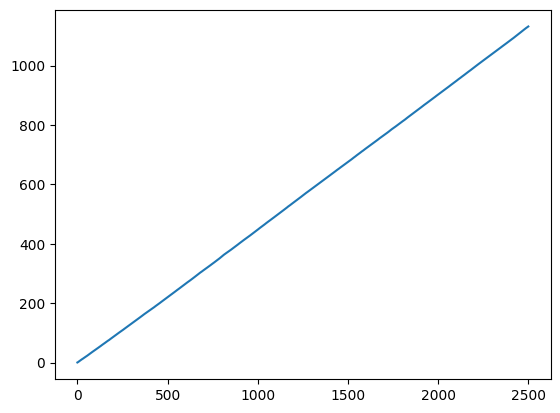

In [44]:
plt.plot( range(horizon), np.mean(res,0) )